# Initialize

In [56]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
plt.rc('font', family = 'Nanumgothic')
plt.style.use(['dark_background'])

import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

import seaborn as sns

import os
from glob import glob

from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Data Load

## Path

In [2]:
cwd = os.getcwd()
print(cwd)

c:\Users\reot1\OneDrive\바탕 화면\House Prices


In [3]:
train_path = glob(f'{cwd}\\**\\train.csv', recursive=True)[0]
test_path = glob(f'{cwd}\\**\\test.csv', recursive=True)[0]
print(f'train path : {train_path}', f'test path : {test_path}', sep='\n\n')

train path : c:\Users\reot1\OneDrive\바탕 화면\House Prices\dataset\train.csv

test path : c:\Users\reot1\OneDrive\바탕 화면\House Prices\dataset\test.csv


## Data

### Data info

In [35]:
description_path = glob(f'{cwd}\\**\\description*.txt', recursive=True)

en_des = [i.strip().split(': ') for i in open(description_path[0]).readlines()]
ko_des = [i.strip().split(': ') for i in open(description_path[1]).readlines()]

data_doc = {i[0] : j[1] for i, j in zip(en_des, ko_des)}

for key, value in data_doc.items():
    print(f'{key} : {value}')

SalePrice : 판매 가격(달러)
MSSubClass : 빌딩 클래스
MSZoning : 일반 구역 분류
LotFrontage : 건물과 연결된 거리의 선형 피트
LotArea : 평방 피트 단위의 로트 크기
Street : 도로 접근 유형
Alley : 골목 접근 유형
LotShape : 특성의 일반 모양
LandContour : 특성의 평탄도
Utilities : 사용 가능한 유틸리티 유형
LotConfig : Lot구성
LandSlope : 재산 경사
Neighborhood : Amescity 제한 내 물리적 위치
Condition1 : 주요 도로 또는 철도와의 근접성
Condition2 : 주요 도로 또는 철도와의 근접성(초가 존재하는 경우)
BldgType : 주거형태
HouseStyle : 주거 스타일
OverallQual : 전체 재료 및 마감 품질
OverallCond : 종합상태등급
YearBuilt : 원래 시공일
YearRemodAdd : 리모델링 날짜
RoofStyle : 지붕의 종류
RoofMatl : 지붕 재료
Exterior1st : 주택 외부 피복
Exterior2nd : 주택 외부 피복(하나 이상의 재료인 경우)
MasVnrType : 석공 베니어 유형
MasVnrArea : 평방 피트의 석조 베니어 구역
ExterQual : 외장재 품질
ExterCond : 외부 소재의 현재 상태
Foundation : 기초의 종류
BsmtQual : 지하실 높이
BsmtCond : 지하실의 일반적인 상태
BsmtExposure : 워크아웃 또는 정원 수준의 지하 벽
BsmtFinType1 : 지하 마감 구역의 품질
BsmtFinSF1 : 타입 1 마감 평방 피트
BsmtFinType2 : 두 번째 마감 영역의 품질(있는 경우)
BsmtFinSF2 : 타입 2 마감 평방 피트
BsmtUnfSF : 지하실 면적의 미완성 평방 피트
TotalBsmtSF : 지하실 면적의 총 평방 피트
Heating : 난방의 종류
HeatingQC : 난방 

In [123]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

# Data Preprocessing

## NA 확인 및 처리

In [115]:
def check_na(df):
    col = {}
    
    for i in df.columns:
        if sum(df[i].isna()) != 0:
            col[i] = sum(df[i].isna())
    
    return col

In [124]:
train_na_col =  check_na(train)
test_na_col = check_na(test)

print(train_na_col)
print(test_na_col)

{'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}
{'MSZoning': 4, 'LotFrontage': 227, 'Alley': 1352, 'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 16, 'MasVnrArea': 15, 'BsmtQual': 44, 'BsmtCond': 45, 'BsmtExposure': 44, 'BsmtFinType1': 42, 'BsmtFinSF1': 1, 'BsmtFinType2': 42, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'FireplaceQu': 730, 'GarageType': 76, 'GarageYrBlt': 78, 'GarageFinish': 78, 'GarageCars': 1, 'GarageArea': 1, 'GarageQual': 78, 'GarageCond': 78, 'PoolQC': 1456, 'Fence': 1169, 'MiscFeature': 1408, 'SaleType': 1}


In [117]:
# train Na
for na, cnt in train_na_col.items():
    print(f'{na} : {cnt} - {data_doc[na]} /// {train[na].dtype}')

LotFrontage : 259 - 건물과 연결된 거리의 선형 피트 /// float64
Alley : 1369 - 골목 접근 유형 /// object
MasVnrType : 8 - 석공 베니어 유형 /// object
MasVnrArea : 8 - 평방 피트의 석조 베니어 구역 /// float64
BsmtQual : 37 - 지하실 높이 /// object
BsmtCond : 37 - 지하실의 일반적인 상태 /// object
BsmtExposure : 38 - 워크아웃 또는 정원 수준의 지하 벽 /// object
BsmtFinType1 : 37 - 지하 마감 구역의 품질 /// object
BsmtFinType2 : 38 - 두 번째 마감 영역의 품질(있는 경우) /// object
Electrical : 1 - 전기 시스템 /// object
FireplaceQu : 690 - 벽난로 품질 /// object
GarageType : 81 - 차고 위치 /// object
GarageYrBlt : 81 - 차고가 건설된 연도 /// float64
GarageFinish : 81 - 차고의 내부 마감 /// object
GarageQual : 81 - Garage 품질 /// object
GarageCond : 81 - 차고 상태 /// object
PoolQC : 1453 - 풀 품질 /// object
Fence : 1179 - 펜스 품질 /// object
MiscFeature : 1406 - 기타 범주에서 다루지 않는 기타 기능 /// object


In [118]:
# test Na
for na, cnt in test_na_col.items():
    print(f'{na} : {cnt} - {data_doc[na]} /// {train[na].dtype}')

MSZoning : 4 - 일반 구역 분류 /// object
LotFrontage : 227 - 건물과 연결된 거리의 선형 피트 /// float64
Alley : 1352 - 골목 접근 유형 /// object
Utilities : 2 - 사용 가능한 유틸리티 유형 /// object
Exterior1st : 1 - 주택 외부 피복 /// object
Exterior2nd : 1 - 주택 외부 피복(하나 이상의 재료인 경우) /// object
MasVnrType : 16 - 석공 베니어 유형 /// object
MasVnrArea : 15 - 평방 피트의 석조 베니어 구역 /// float64
BsmtQual : 44 - 지하실 높이 /// object
BsmtCond : 45 - 지하실의 일반적인 상태 /// object
BsmtExposure : 44 - 워크아웃 또는 정원 수준의 지하 벽 /// object
BsmtFinType1 : 42 - 지하 마감 구역의 품질 /// object
BsmtFinSF1 : 1 - 타입 1 마감 평방 피트 /// int64
BsmtFinType2 : 42 - 두 번째 마감 영역의 품질(있는 경우) /// object
BsmtFinSF2 : 1 - 타입 2 마감 평방 피트 /// int64
BsmtUnfSF : 1 - 지하실 면적의 미완성 평방 피트 /// int64
TotalBsmtSF : 1 - 지하실 면적의 총 평방 피트 /// int64
BsmtFullBath : 2 - 지하실 전체 욕실 /// int64
BsmtHalfBath : 2 - 지하 반 욕실 /// int64
KitchenQual : 1 - 주방퀄리티 /// object
Functional : 2 - 홈 기능 등급 /// object
FireplaceQu : 730 - 벽난로 품질 /// object
GarageType : 76 - 차고 위치 /// object
GarageYrBlt : 78 - 차고가 건설된 연도 /// float64
GarageF

```
Train 데이터의 1/2 이상 결측치인 컬럼 삭제
```

In [125]:
del_col = []

for key, val in train_na_col.items():
    
    if val > len(train) / 2:
        train.drop(key, inplace=True, axis=1)
        test.drop(key, inplace=True, axis=1)
        del_col.append(key)


In [126]:
for col in del_col:
    del train_na_col[col]
    del test_na_col[col]

In [127]:
for na, cnt in train_na_col.items():
    print(f'{na} : {cnt} - {data_doc[na]} /// {train[na].dtype}')

LotFrontage : 259 - 건물과 연결된 거리의 선형 피트 /// float64
MasVnrType : 8 - 석공 베니어 유형 /// object
MasVnrArea : 8 - 평방 피트의 석조 베니어 구역 /// float64
BsmtQual : 37 - 지하실 높이 /// object
BsmtCond : 37 - 지하실의 일반적인 상태 /// object
BsmtExposure : 38 - 워크아웃 또는 정원 수준의 지하 벽 /// object
BsmtFinType1 : 37 - 지하 마감 구역의 품질 /// object
BsmtFinType2 : 38 - 두 번째 마감 영역의 품질(있는 경우) /// object
Electrical : 1 - 전기 시스템 /// object
FireplaceQu : 690 - 벽난로 품질 /// object
GarageType : 81 - 차고 위치 /// object
GarageYrBlt : 81 - 차고가 건설된 연도 /// float64
GarageFinish : 81 - 차고의 내부 마감 /// object
GarageQual : 81 - Garage 품질 /// object
GarageCond : 81 - 차고 상태 /// object


In [128]:
for na, cnt in test_na_col.items():
    print(f'{na} : {cnt} - {data_doc[na]} /// {train[na].dtype}')

MSZoning : 4 - 일반 구역 분류 /// object
LotFrontage : 227 - 건물과 연결된 거리의 선형 피트 /// float64
Utilities : 2 - 사용 가능한 유틸리티 유형 /// object
Exterior1st : 1 - 주택 외부 피복 /// object
Exterior2nd : 1 - 주택 외부 피복(하나 이상의 재료인 경우) /// object
MasVnrType : 16 - 석공 베니어 유형 /// object
MasVnrArea : 15 - 평방 피트의 석조 베니어 구역 /// float64
BsmtQual : 44 - 지하실 높이 /// object
BsmtCond : 45 - 지하실의 일반적인 상태 /// object
BsmtExposure : 44 - 워크아웃 또는 정원 수준의 지하 벽 /// object
BsmtFinType1 : 42 - 지하 마감 구역의 품질 /// object
BsmtFinSF1 : 1 - 타입 1 마감 평방 피트 /// int64
BsmtFinType2 : 42 - 두 번째 마감 영역의 품질(있는 경우) /// object
BsmtFinSF2 : 1 - 타입 2 마감 평방 피트 /// int64
BsmtUnfSF : 1 - 지하실 면적의 미완성 평방 피트 /// int64
TotalBsmtSF : 1 - 지하실 면적의 총 평방 피트 /// int64
BsmtFullBath : 2 - 지하실 전체 욕실 /// int64
BsmtHalfBath : 2 - 지하 반 욕실 /// int64
KitchenQual : 1 - 주방퀄리티 /// object
Functional : 2 - 홈 기능 등급 /// object
FireplaceQu : 730 - 벽난로 품질 /// object
GarageType : 76 - 차고 위치 /// object
GarageYrBlt : 78 - 차고가 건설된 연도 /// float64
GarageFinish : 78 - 차고의 내부 마감 /// object
G

In [130]:
for na, cnt in train_na_col.items():
    print(train[na].value_counts())
    print()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Gd   

```
Train Col
LotFrontage -> 0
MasVnrType -> None
MasVnrArea -> 0
BsmtQual -> NA
BsmtCond -> NA
BsmtExposure -> NA
BsmtFinType1 -> NA
BsmtFinType2 -> NA
Electrical -> Delete
FireplaceQu -> NA
GarageType -> NA
GarageYrBlt -> 0
GarageFinish -> NA
GarageQual -> NA
GarageCond -> NA
```

In [132]:
train_fill_na = [0, 'None', 0, 'NA', 'NA', 'NA','NA', 'NA', 'drop', 'NA', 'NA', 0, 'NA', 'NA', 'NA']

In [133]:
for na_tp, fill_value in zip(train_na_col.items(), train_fill_na):
    na = na_tp[0]
    
    if fill_value == 'drop':
        train.dropna(subset=[na], axis=0, inplace=True)
        test.dropna(subset=[na], axis=0, inplace=True)
    
    train[na] = train[na].fillna(fill_value)
    test[na] = test[na].fillna(fill_value)

In [134]:
train_na_col2 = check_na(train)
print(train_na_col2)

{}


In [136]:
test_na_col2 = check_na(test)

for na, cnt in test_na_col2.items():
    print(f'{na} : {cnt} - {data_doc[na]} /// {test[na].dtype}')

MSZoning : 4 - 일반 구역 분류 /// object
Utilities : 2 - 사용 가능한 유틸리티 유형 /// object
Exterior1st : 1 - 주택 외부 피복 /// object
Exterior2nd : 1 - 주택 외부 피복(하나 이상의 재료인 경우) /// object
BsmtFinSF1 : 1 - 타입 1 마감 평방 피트 /// float64
BsmtFinSF2 : 1 - 타입 2 마감 평방 피트 /// float64
BsmtUnfSF : 1 - 지하실 면적의 미완성 평방 피트 /// float64
TotalBsmtSF : 1 - 지하실 면적의 총 평방 피트 /// float64
BsmtFullBath : 2 - 지하실 전체 욕실 /// float64
BsmtHalfBath : 2 - 지하 반 욕실 /// float64
KitchenQual : 1 - 주방퀄리티 /// object
Functional : 2 - 홈 기능 등급 /// object
GarageCars : 1 - 자동차 용량의 차고 /// float64
GarageArea : 1 - 평방 피트의 차고 크기 /// float64
SaleType : 1 - 판매유형 /// object


```
나머지 Test Na 값 최빈값으로 대체
```

In [137]:
for na, cnt in test_na_col2.items():
    print(test[na].value_counts())
    print()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

AllPub    1457
Name: Utilities, dtype: int64

VinylSd    510
MetalSd    230
HdBoard    220
Wd Sdng    205
Plywood    113
CemntBd     65
BrkFace     37
WdShing     30
AsbShng     24
Stucco      18
BrkComm      4
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

VinylSd    510
MetalSd    233
HdBoard    199
Wd Sdng    194
Plywood    128
CmentBd     66
Wd Shng     43
BrkFace     22
Stucco      21
AsbShng     18
Brk Cmn     15
ImStucc      5
CBlock       2
AsphShn      1
Stone        1
Name: Exterior2nd, dtype: int64

0.0       462
24.0       15
276.0       6
602.0       6
300.0       5
         ... 
1337.0      1
656.0       1
706.0       1
496.0       1
337.0       1
Name: BsmtFinSF1, Length: 669, dtype: int64

0.0      1278
483.0       3
162.0       3
294.0       3
144.0       2
         ... 
110.0       1
186.0       1
449.0       1
48.0        1
344.0       1
Name:

In [143]:
for col in test_na_col2:
    test[col] = test[col].fillna(test[col].value_counts().keys()[0])

In [144]:
test_na_col3 = check_na(test)
print(test_na_col3)

{}


## Numeric, Object Col

In [145]:
numeric_col = []
object_col = []

for col in train.columns:
    if train[col].dtype == 'object':
        object_col.append(col)
    else:
        numeric_col.append(col)
        
print(numeric_col, object_col, sep='\n\n')
print()
print(f'numeric_col : {len(numeric_col)}\nobject_col : {len(object_col)}')

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',

In [146]:
# Id 컬럼 삭제
numeric_col.remove('Id')

### Numeric Histogram

In [147]:
# 기초 통계량 확인
train[numeric_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.0,56.881426,42.310746,20.0,20.0,50.0,70.0,190.0
LotFrontage,1459.0,57.612748,34.673850,0.0,42.0,63.0,79.0,313.0
LotArea,1459.0,10517.363948,9984.666267,1300.0,7549.0,9477.0,11603.0,215245.0
OverallQual,1459.0,6.100069,1.383171,1.0,5.0,6.0,7.0,10.0
OverallCond,1459.0,5.575737,1.113079,1.0,5.0,5.0,6.0,9.0
YearBuilt,1459.0,1971.244003,30.199555,1872.0,1954.0,1973.0,2000.0,2010.0
YearRemodAdd,1459.0,1984.850583,20.644343,1950.0,1967.0,1994.0,2004.0,2010.0
MasVnrArea,1459.0,103.187800,180.773158,0.0,0.0,0.0,164.5,1600.0
BsmtFinSF1,1459.0,443.943797,456.106417,0.0,0.0,384.0,712.5,5644.0
BsmtFinSF2,1459.0,46.581220,161.369977,0.0,0.0,0.0,0.0,1474.0


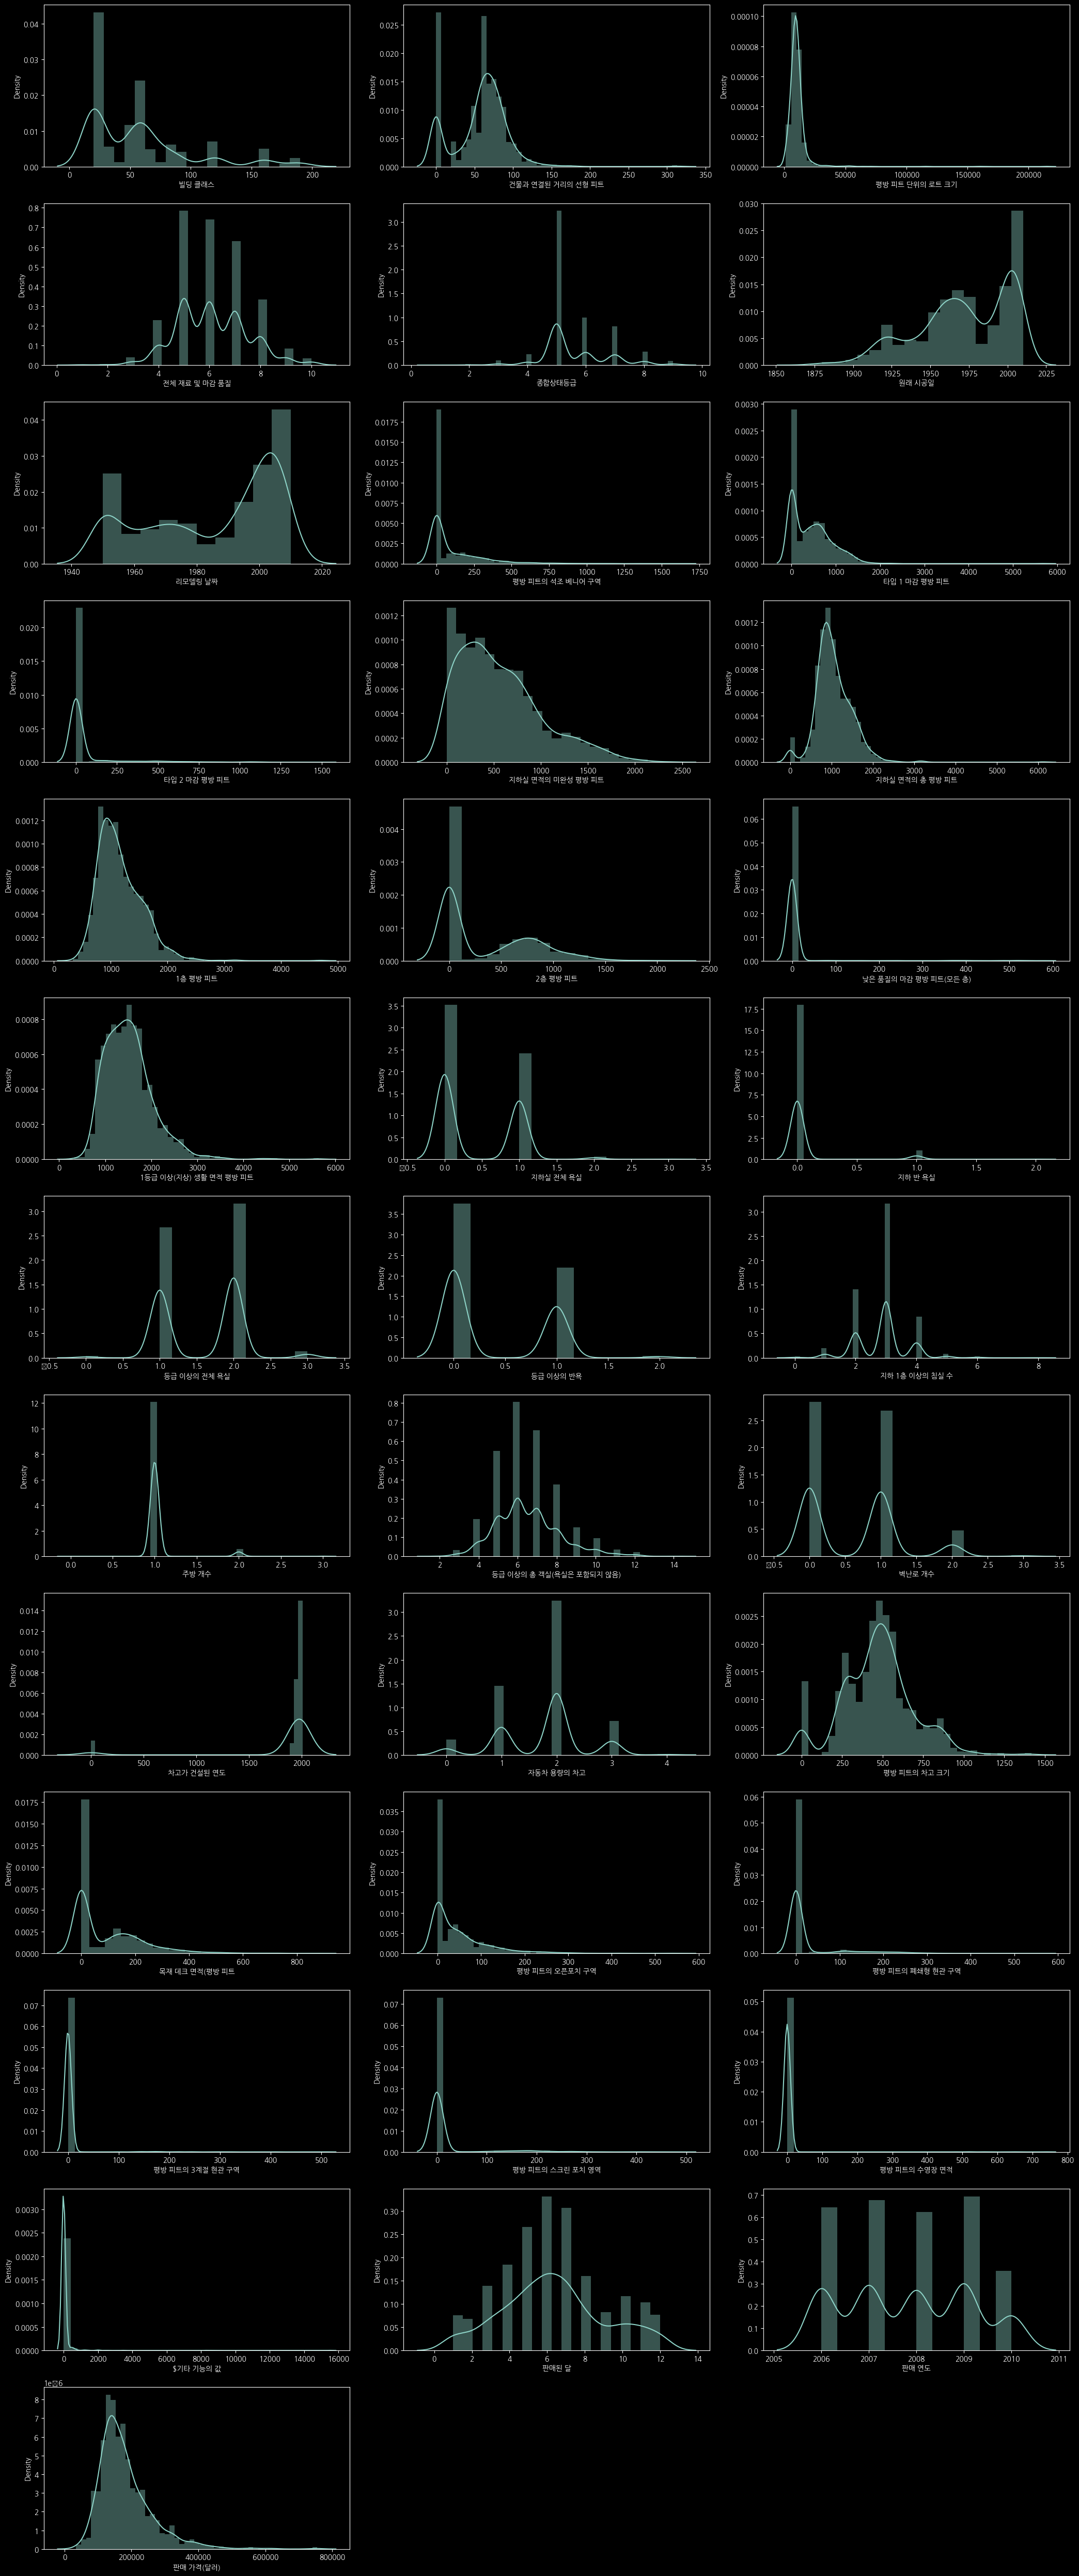

In [38]:
for i in range(0, len(numeric_col)):
    plt.subplot(len(numeric_col)//3 + 1, 3, i+1)
    sns.distplot(train[numeric_col[i]])
    plt.xlabel(data_doc[numeric_col[i]])
plt.gcf().set_size_inches(21,50)
plt.tight_layout()
plt.show()

In [59]:
# 판매 가격과의 상관관계 파악

numeric_corr = train[numeric_col].corr()
numeric_corr = numeric_corr.apply(lambda x:round(x, 2))

In [86]:
sorted(list(filter(lambda x : abs(x[1]) <= 0.4, numeric_corr['SalePrice'].items())) , key = lambda x:-x[1])

[('BsmtFinSF1', 0.39),
 ('2ndFlrSF', 0.32),
 ('WoodDeckSF', 0.32),
 ('OpenPorchSF', 0.32),
 ('HalfBath', 0.28),
 ('LotArea', 0.26),
 ('GarageYrBlt', 0.26),
 ('BsmtFullBath', 0.23),
 ('LotFrontage', 0.21),
 ('BsmtUnfSF', 0.21),
 ('BedroomAbvGr', 0.17),
 ('ScreenPorch', 0.11),
 ('PoolArea', 0.09),
 ('MoSold', 0.05),
 ('3SsnPorch', 0.04),
 ('BsmtFinSF2', -0.01),
 ('BsmtHalfBath', -0.02),
 ('MiscVal', -0.02),
 ('LowQualFinSF', -0.03),
 ('YrSold', -0.03),
 ('MSSubClass', -0.08),
 ('OverallCond', -0.08),
 ('EnclosedPorch', -0.13),
 ('KitchenAbvGr', -0.14)]

In [64]:
numeric_corr_top10 = numeric_corr.nlargest(10, 'SalePrice')
numeric_corr_top10 = numeric_corr_top10[list(numeric_corr_top10.index)]
numeric_corr_top10

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
SalePrice,1.00,0.79,0.71,0.64,0.62,0.61,0.61,0.56,0.53,0.52
OverallQual,0.79,1.00,0.59,0.60,0.56,0.54,0.48,0.55,0.43,0.57
GrLivArea,0.71,0.59,1.00,0.47,0.47,0.46,0.57,0.63,0.83,0.20
GarageCars,0.64,0.60,0.47,1.00,0.88,0.44,0.44,0.47,0.36,0.54
GarageArea,0.62,0.56,0.47,0.88,1.00,0.49,0.49,0.41,0.34,0.48
TotalBsmtSF,0.61,0.54,0.46,0.44,0.49,1.00,0.82,0.32,0.29,0.39
1stFlrSF,0.61,0.48,0.57,0.44,0.49,0.82,1.00,0.38,0.41,0.28
FullBath,0.56,0.55,0.63,0.47,0.41,0.32,0.38,1.00,0.55,0.47
TotRmsAbvGrd,0.53,0.43,0.83,0.36,0.34,0.29,0.41,0.55,1.00,0.10
YearBuilt,0.52,0.57,0.20,0.54,0.48,0.39,0.28,0.47,0.10,1.00


### Object Histogram

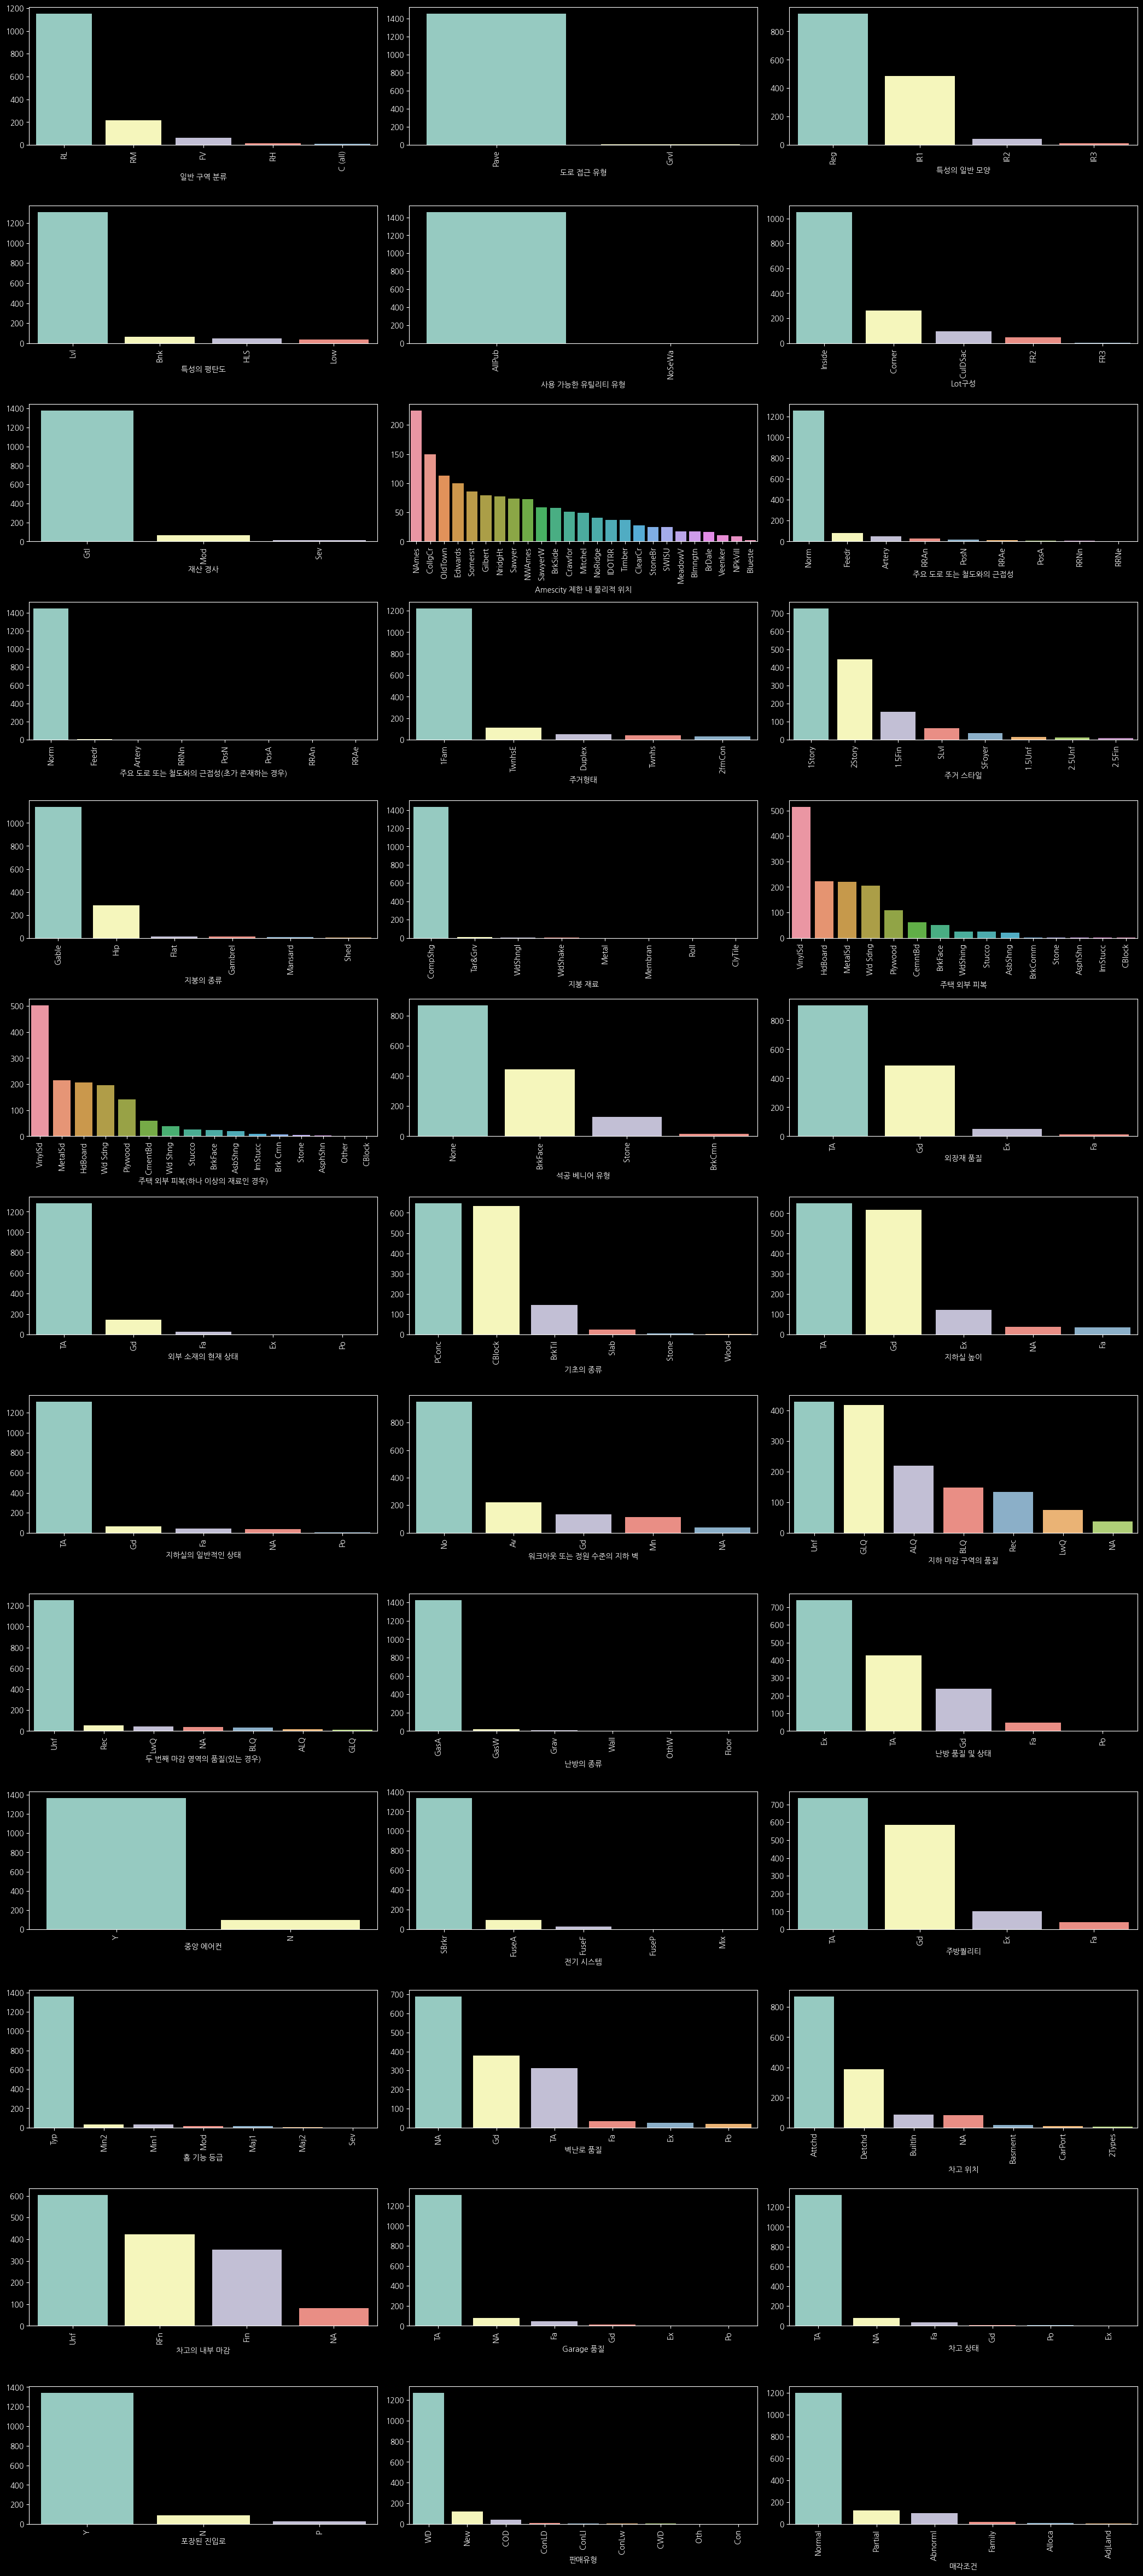

In [52]:
for i in range(0, len(object_col)):
    plt.subplot(len(object_col)//3 + 1, 3, i+1)
    sns.barplot(x= train[object_col[i]].value_counts().keys(), y= train[object_col[i]].value_counts().values)
    plt.xlabel(data_doc[object_col[i]])
    plt.xticks(rotation=90)
plt.gcf().set_size_inches(21,50)
plt.tight_layout()
plt.show()

## LabelEncoding

In [148]:
c_train = train.copy()
c_test = test.copy()

for object_ in object_col:
    la_enco = LabelEncoder()
    c_train[object_] = la_enco.fit_transform(c_train[object_])
    c_test[object_] = la_enco.transform(c_test[object_])

In [150]:
train_enco_check = check_na(c_train)
test_enco_check = check_na(c_train)

print(train_enco_check, test_enco_check)

{} {}


## Data Scaling

```
Numeric Col에 한에서만 Scaling  진행

정규화, 표준화 각각 진행
```

### MinMax

In [161]:
mm_train = c_train.copy()
mm_test = c_test.copy()

In [ ]:
numeric_col.remove('SalePrice')

In [163]:
mm_scale = MinMaxScaler()
mm_train[numeric_col] = mm_scale.fit_transform(mm_train[numeric_col])
mm_test[numeric_col] = mm_scale.transform(mm_test[numeric_col])

In [166]:
mm_train.to_csv('./mm_train.csv', index=False)
mm_test.to_csv('./mm_test.csv', index=False)

### Standard

In [167]:
st_train = c_train.copy()
st_test = c_test.copy()

In [168]:
st_scale = StandardScaler()
st_train[numeric_col] = st_scale.fit_transform(st_train[numeric_col])
st_test[numeric_col] = st_scale.transform(st_test[numeric_col])

In [171]:
st_train.to_csv('./st_train.csv', index=False)
st_test.to_csv('./st_test.csv', index=False)